<a href="https://colab.research.google.com/github/Meghana-3005/WEEK-3/blob/main/WasteClassification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [37]:
# Importing necessary librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore') # Changed 'ingnore' to 'ignore'

In [38]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/"

In [39]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob

In [40]:
#visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
  for file in tqdm(glob(category+'/*')):
    img_array = cv2.imread(file)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    x_data.append(img_array)
    y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:06<00:00, 2013.78it/s]


In [41]:
data.shape

(22564, 2)

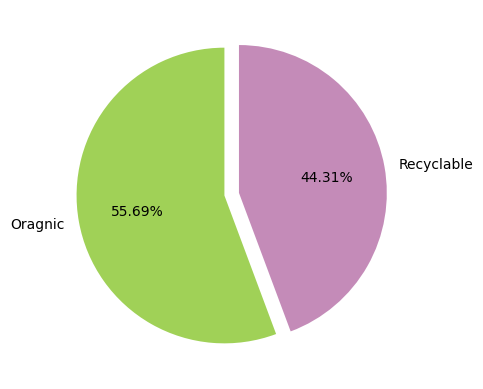

In [42]:
colors = ['#a0d157' , '#c48bb8'] # Add '#' prefix to hexadecimal color codes
plt.pie(data.label.value_counts(), labels=['Oragnic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors,startangle = 90, explode=[0.05, 0.05])
plt.show() # Call the show function to display the plot

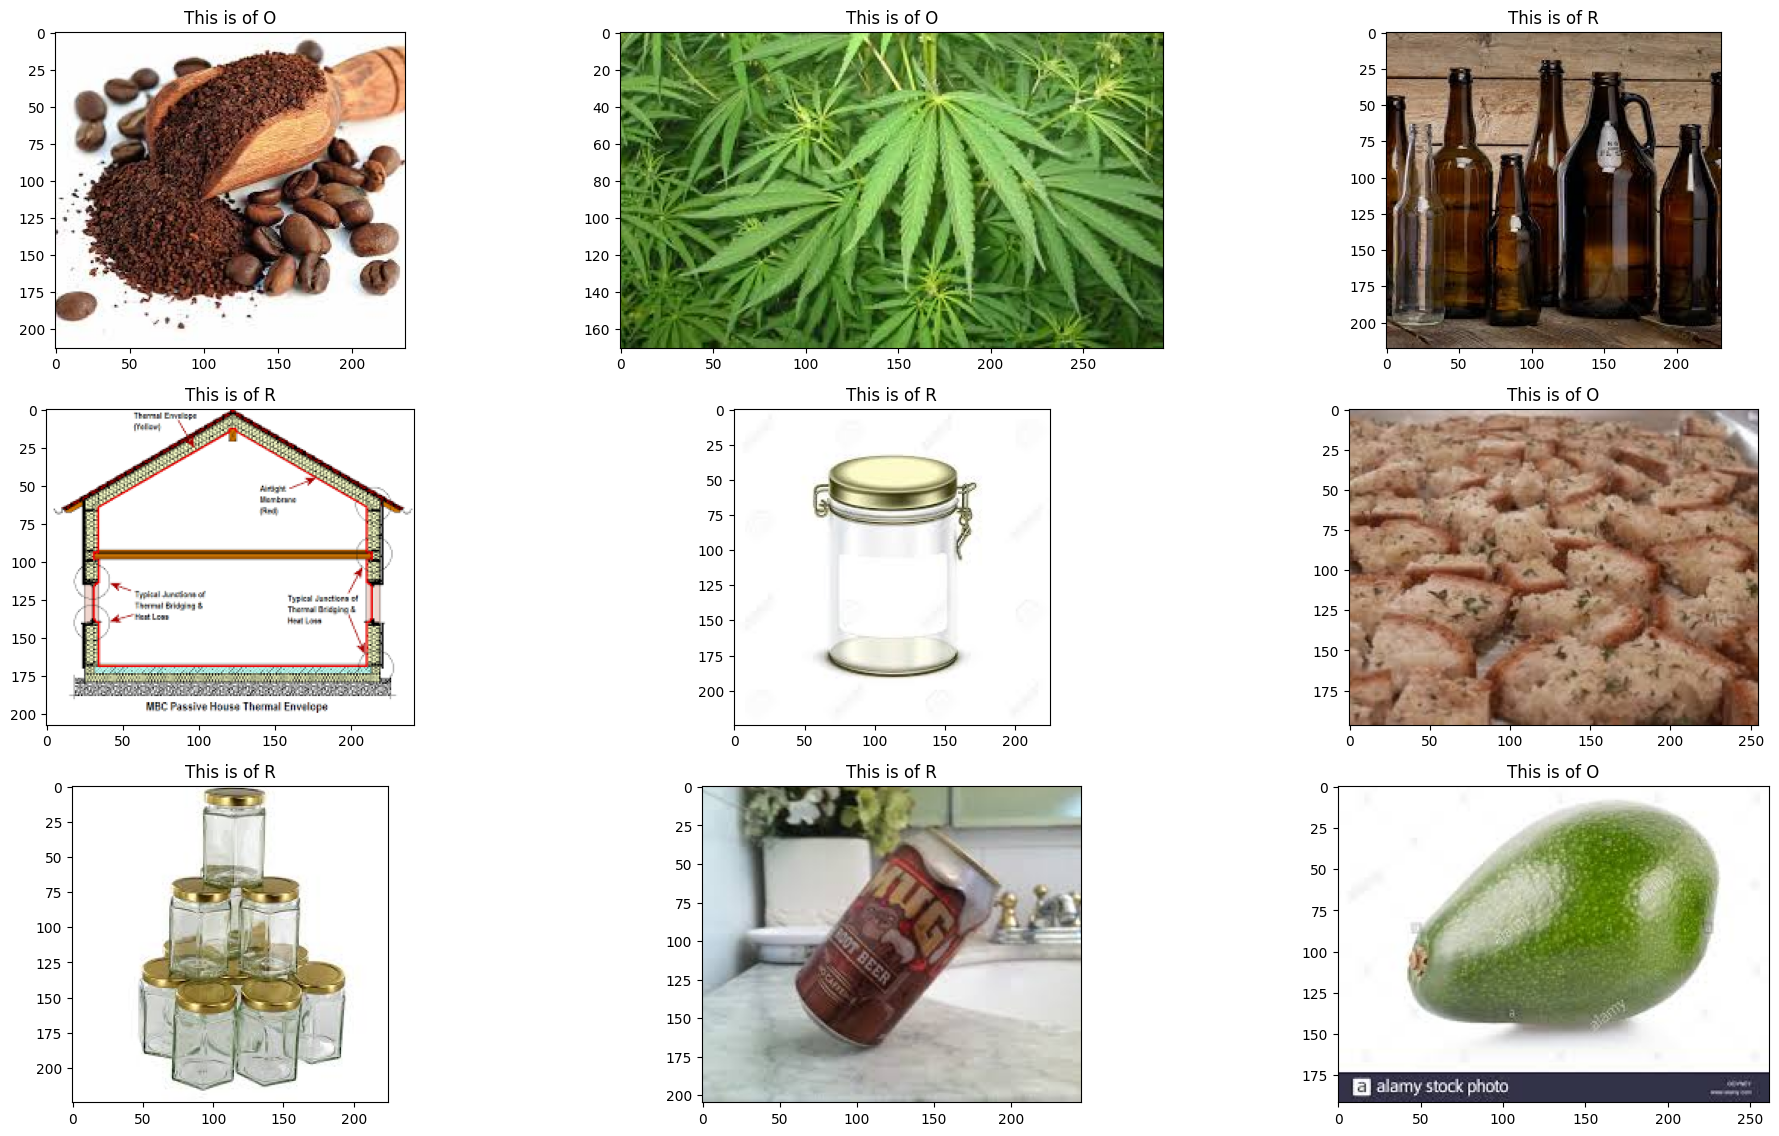

In [44]:
plt.figure(figsize=(20, 15))
for i in range(9):
  plt.subplot(4, 3,(i%12)+1)
  index = np.random.randint(15000)
  plt.title('This is of {0}' .format(data.label[index]))
  plt.imshow(data.image[index])
  plt.tight_layout()


In [45]:
#Importing necessary libraries
from tensorflow.keras.models import Sequential # This line is crucial
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
model = Sequential()
model.add(Conv2D(32, (3,3) , input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
train_datagen = ImageDataGenerator(rescale =1./255)

In [48]:
test_datagen = ImageDataGenerator(rescale =1./255)

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [50]:
hist = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator)

Epoch 1/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 58s 601ms/step - accuracy: 0.7272 - loss: 0.6269 - val_accuracy: 0.8587 - val_loss: 0.3497
Epoch 2/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 568ms/step - accuracy: 0.8266 - loss: 0.4232 - val_accuracy: 0.8798 - val_loss: 0.3151
Epoch 3/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 587ms/step - accuracy: 0.8500 - loss: 0.3690 - val_accuracy: 0.8957 - val_loss: 0.2732
Epoch 4/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 558ms/step - accuracy: 0.8636 - loss: 0.3389 - val_accuracy: 0.8989 - val_loss: 0.2793
Epoch 5/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 561ms/step - accuracy: 0.8788 - loss: 0.3103 - val_accuracy: 0.8934 - val_loss: 0.2775
Epoch 6/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 562ms/step - accuracy: 0.8835 - loss: 0.2932 - val_accuracy: 0.8818 - val_loss: 0.3025
Epoch 7/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 558ms/step - accuracy: 0.8972 - loss: 0.2620 - val_accuracy: 0.8973 - val_loss: 0.2806
Epoch 8/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 552ms/step - accuracy: 0.9101 - loss: 0.2329 - val_accu

<function matplotlib.pyplot.show(close=None, block=None)>

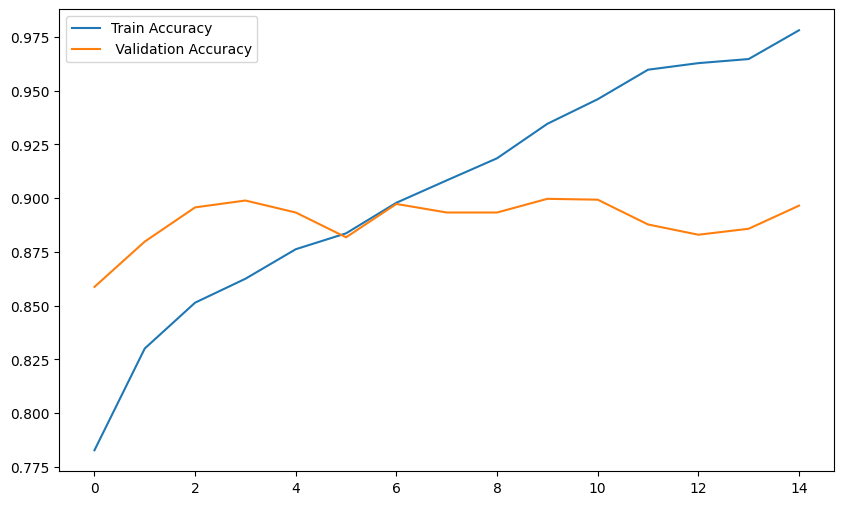

In [51]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

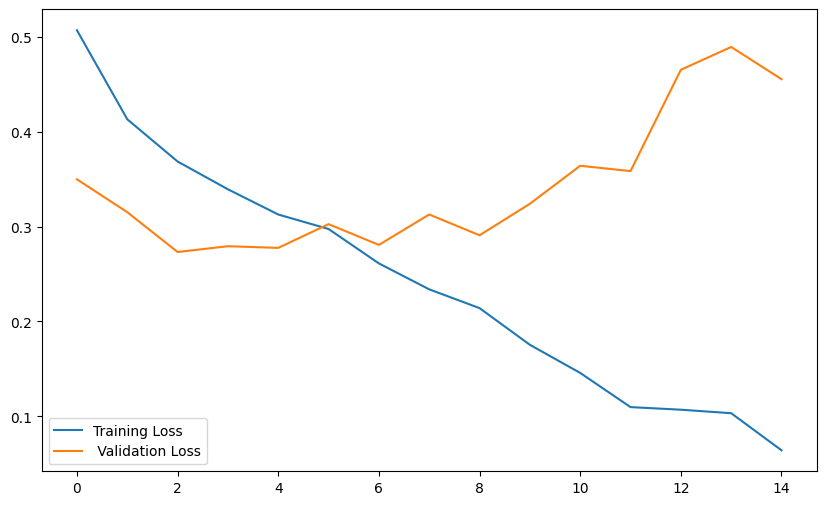

In [52]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label=' Validation Loss')
plt.legend()
plt.show

In [61]:
def predict_fun(img):
  plt.figure(figsize=(6,4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224,224,3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('this image show is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The image shown is Organic Waste


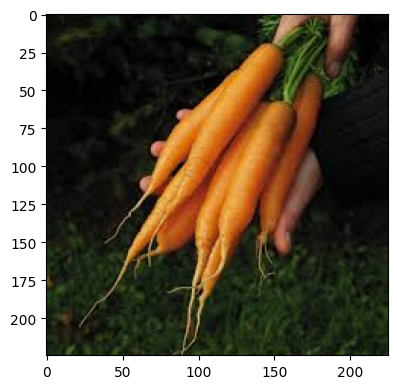

In [62]:
test_img = cv2.imread("/content/O_12569.jpg")
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The image shown is Recyclable Waste


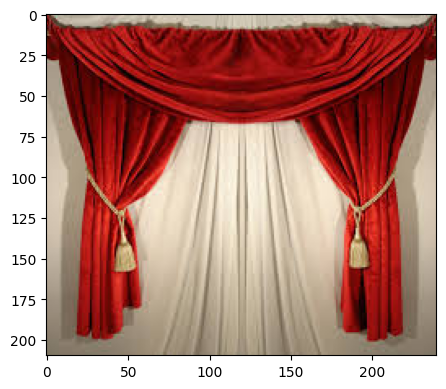

In [60]:
test_img = cv2.imread("/content/R_10000.jpg")
predict_fun(test_img)